In [1]:
%pylab inline
from requests import post
from app.analysis import Quote
def screen_funds(*filter, min_assets=1, max_expense=1):
    query = 'query screen($filter:[String!]!,$limit:[FundLimitOptionInput!]!){viewer{screenFunds(filterCategory:$filter,limit:$limit,sort:{type:FUND_TOTAL_ASSETS,direction:DESC},first:100){edges{node{symbol}}}}}'
    variables = {'filter':filter,'limit':[{'type':'FUND_TOTAL_ASSETS','min':min_assets*1000000000,'inclusive':True},{'type':'FUND_NET_EXPENSE_RATIO','max':max_expense,'inclusive':True}]}
    r = post('https://lens.m1finance.com/graphql', json={'query': query, 'variables': variables}).json()
    return [n['node']['symbol'] for n in r['data']['viewer']['screenFunds']['edges']]

Populating the interactive namespace from numpy and matplotlib


In [2]:
quote = Quote(screen_funds('Equities', 'Foreign') + ['VT', 'ACWI'], 75, 5)
print(f'from {quote.start.date()} to {quote.end.date()} - {len(quote.data.columns)}')

from 2019-04-24 to 2019-07-08 - 77


In [5]:
stats = quote.statistics()
stats = stats[stats['shrp'] > 0]
print(len(stats))
stats

49


,len,mean,std,shrp,drawdown
Symbols,,,,,
RSX,47,1.135172,1.795885,0.610000,4.396116
EWL,47,0.648796,1.438208,0.423523,3.113807
EFAV,47,0.421575,1.066634,0.358035,2.819624
EWA,47,0.579595,1.552687,0.347728,3.100777
EWZ,47,1.048580,3.574789,0.282226,10.630581
VIGI,47,0.434298,1.470650,0.268327,4.587566
EFG,47,0.367837,1.602110,0.204826,4.537548
EPP,47,0.375365,1.684036,0.199332,4.599415
FEZ,47,0.339793,1.878870,0.159729,5.862513


evicted EWC 0.8948366447621847
evicted DGS 0.7832568627060675
evicted EWH 0.8811801087239044
evicted HEDJ 0.8416626977533973
evicted EFAV 0.7951411972952425
evicted INDA 0.5067175485449451
evicted EWA 0.6548575478394724
evicted EWZ 0.4409412130290021
retry backlogs ['VGK', 'VT', 'VXUS', 'IEV', 'CWI', 'ACWX', 'VEU', 'VPL', 'GSIE', 'EFA', 'VEA', 'HEFA', 'RODM', 'IEFA', 'EWJ', 'IXUS', 'IDEV', 'IEUR', 'EZU', 'TLTD', 'PXH', 'INTF', 'SCHF', 'EPP', 'ILF', 'VSS', 'SPDW', 'EFG', 'VYMI', 'ACWI', 'DBEF', 'EPI', 'DEM', 'FNDE', 'SPEM', 'FEZ', 'EWL', 'EWG', 'IPAC', 'VIGI'] at 0.905 - 0.609999614359859
evicted SPEM 0.847554943832929
evicted EPP 0.8111664711368853
evicted ILF 0.5989433356492552
evicted EPI 0.43622133292016296
evicted EWL 0.8002649966108177
retry backlogs ['VEA', 'VXUS', 'ACWX', 'VEU', 'VT', 'EZU', 'HEFA', 'CWI', 'IXUS', 'SCHF', 'IEV', 'VGK', 'IDEV', 'PXH', 'IEUR', 'EFG', 'IEFA', 'EFA', 'VPL', 'DEM', 'EWJ', 'TLTD', 'INTF', 'GSIE', 'SPDW', 'VYMI', 'ACWI', 'FEZ', 'DBEF', 'VSS', 'FNDE', '

,count,mean,std,min,25%,50%,75%,max,shrp,drawdown
RSX,47.0,1.135172,1.795885,-3.457943,0.044621,1.195953,2.402487,4.199471,0.61,4.396116
Portfolio,47.0,1.135172,1.795885,-3.457943,0.044621,1.195953,2.402487,4.199471,0.61,4.396116


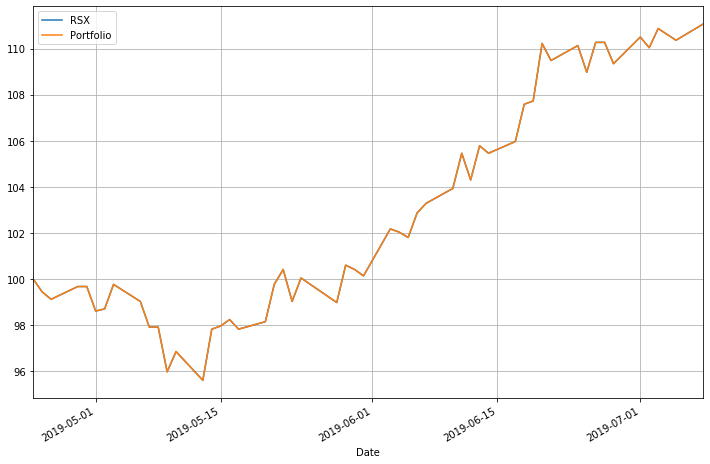

In [8]:
quote.setup_mask(stats.index)
ratio, shrp = quote.optimize_portfolio(.1)
print(ratio, shrp)
quote.setup_mask(ratio)
quote.graph(ratio)